In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [48]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [49]:
len(x_test)
len(x_train)

60000

In [50]:
x_train.shape

(60000, 28, 28)

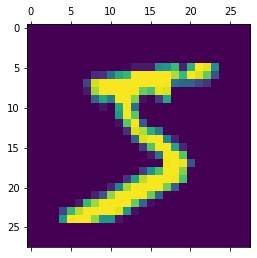

In [51]:
#showing
plt.matshow(x_train[0])

In [52]:
y_train[0]

5

In [56]:
x_train_flatten =  x_train.reshape(len(x_train),28*28)/255
x_test_flatten =  x_test.reshape(len(x_test),28*28)/255

In [57]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
#creating a simple NN with only 2 layers i/o
model = keras.Sequential([ keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
                 ])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4629 - accuracy: 0.8799
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9260


In [59]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.9250


[0.26980650424957275, 0.925000011920929]

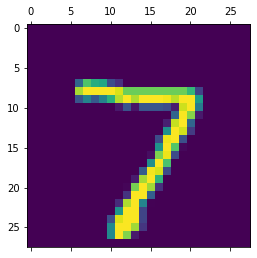

In [60]:
plt.matshow(x_test[0])


In [63]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.83857919e-02, 2.76665304e-07, 4.75294068e-02, 9.54721808e-01,
       2.31364858e-03, 9.04625431e-02, 1.64191783e-06, 9.99775350e-01,
       1.07637145e-01, 6.57148421e-01], dtype=float32)

In [65]:
np.argmax(y_pred[0])

7

In [74]:
y_pred_lab = [np.argmax(i) for i in y_pred]


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_lab)
print(cm)

[[ 966    0    2    2    0    3    4    1    2    0]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   7    8  929   15    7    2   11    9   41    3]
 [   4    0   21  926    1   14    2    8   26    8]
 [   2    1    6    1  913    0    9    3   10   37]
 [  11    2    5   43   11  749   14    7   42    8]
 [  15    3    9    1    8   10  907    1    4    0]
 [   2    5   22    8    8    1    0  940    4   38]
 [   8    7    6   18    9   17    7    9  886    7]
 [  11    7    1   10   27    4    0   15    9  925]]


In [78]:
#adding a hidden layer
model = keras.Sequential([ keras.layers.Dense(100,input_shape=(784,),
                        activation='relu' ),
                    keras.layers.Dense(10,activation='sigmoid')
                         ])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9838


In [85]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),
        activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid')
                         ])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1583/1875 [========================>.....] - ETA: 0s - loss: 2.6973 - accuracy: 0.8272

KeyboardInterrupt: 